# Importation du fichier initial

In [5]:
import numpy as np
import pandas as pd
import csv
import pickle

train_enz = pd.read_csv(r'C:\Users\rosaire.le\Documents\GitHub\Prediction-de-la-stabilite-de-differentes-enzymes\train.csv', encoding ='utf8')
train_enz

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


In [6]:
train_enz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


On peut ici voir, que nous avons 5 colonnes. L'une d'elle, data_source, ne nous sera pas d'utilité pour ce projet, nous pouvons donc la supprimer.

In [7]:
train_enz=train_enz.drop(['data_source'],axis=1)

# Importation du fichier contenant les lignes modifiées

In [9]:
train_enz_2 = pd.read_csv(r'C:\Users\rosaire.le\Documents\GitHub\Prediction-de-la-stabilite-de-differentes-enzymes\train_updates_20220929.csv', encoding ='utf8')
train_enz_2

,seq_id,protein_sequence,pH,data_source,tm
0,69,NaN,NaN,NaN,NaN
1,70,NaN,NaN,NaN,NaN
2,71,NaN,NaN,NaN,NaN
3,72,NaN,NaN,NaN,NaN
4,73,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2429,30738,NaN,NaN,NaN,NaN
2430,30739,NaN,NaN,NaN,NaN
2431,30740,NaN,NaN,NaN,NaN
2432,30741,NaN,NaN,NaN,NaN


In [10]:
train_enz_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            2434 non-null   int64  
 1   protein_sequence  25 non-null     object 
 2   pH                25 non-null     float64
 3   data_source       0 non-null      float64
 4   tm                25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 95.2+ KB


# Remplacement des données modifiées dans le premier dataset

In [11]:
train_enz_modif=train_enz_2.loc[(train_enz_2['protein_sequence'].notna())|(train_enz_2['pH'].notna())|(train_enz_2['tm'].notna())]

In [12]:
train_enz_modif

,seq_id,protein_sequence,pH,data_source,tm
25,973,DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,NaN,48.4
28,986,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVTFQNRESVLPT...,7.0,NaN,48.4
29,988,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,7.0,NaN,49.0
30,989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,5.5,NaN,55.6
33,1003,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESTLPT...,7.0,NaN,48.4
38,1012,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,NaN,48.4
39,1014,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,5.5,NaN,55.6
40,1018,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,NaN,49.0
46,1037,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,NaN,49.0
47,1042,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,NaN,48.4


Transformons la colonne seq id en index

In [13]:
train_enz_modif.set_index('seq_id',inplace=True)

In [14]:
list_modif=train_enz_modif.index.tolist()

In [15]:
for i in list_modif:
    train_enz.at[i,'protein_sequence']=train_enz_modif.at[i,'protein_sequence']
    train_enz.at[i,'pH']=train_enz_modif.at[i,'pH']
    train_enz.at[i,'tm']=train_enz_modif.at[i,'tm']

# Observation des doublons

In [16]:
train_enz.loc[train_enz[['protein_sequence','pH']].duplicated(keep=False),:]

,seq_id,protein_sequence,pH,tm
972,972,DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,45.2
973,973,DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,48.4
974,974,DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,48.0
982,982,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQAGVVFQNRESVLPT...,7.0,31.8
983,983,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQAGVVFQNRESVLPT...,7.0,52.6
...,...,...,...,...
30797,30797,TLSKSDAKKAASKMLLEKTQFSDKPVQDRGLVVTDIKAEDVVLEHR...,7.0,54.6
31079,31079,VQLGQQVLECRAVLGGTRNPRRMRPEQEELVMLGADHVEYRYGKAM...,7.0,52.2
31080,31080,VQLGQQVLECRAVLGGTRNPRRMRPEQEELVMLGADHVEYRYGKAM...,7.0,56.3
31271,31271,YFIMACDQYSCSLTAPALDIATGHASLADIWAKTPPVTAKAAQLYA...,7.0,51.3


Nous voyons ici qu'il y a plusieurs doublons, cependant, il faut prendre en compte que ces proteines ont également pu être testé dans des dilutions diverses ce qui entraine cette différence de tm entre proteine de même séquence testées au même pH.

# Observation des valeurs abberantes 

## Colonne protein sequence

In [17]:
train_enz['protein_sequence'].describe()

count                                                 31390
unique                                                28981
top       MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
freq                                                     14
Name: protein_sequence, dtype: object

On voit ainsi, que nous avons 28981 séquences protéiniques différentes, dont une qui a été testée 14 fois.

## Colonne pH

In [18]:
train_enz['pH'].describe()

count    31104.000000
mean         6.856534
std          1.009352
min          1.990000
25%          7.000000
50%          7.000000
75%          7.000000
max         53.400000
Name: pH, dtype: float64

On voit ici, que le nombre min est de 1.99 et le max est de 53.4. Hors on sait qu'un pH varie entre 0 et 14. Observons les valeurs au dessus de 14 de plus près.

In [19]:
train_enz.loc[train_enz['pH']>14]

,seq_id,protein_sequence,pH,tm
22116,22116,MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...,53.4,0.1
22123,22123,MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...,53.4,1.2
22131,22131,MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...,53.4,0.6
22145,22145,MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...,53.4,0.1


Remplaçons ces valeurs par des valeurs nulles.

In [20]:
ph_abb=train_enz.loc[train_enz['pH']>14].index.tolist()
for i in ph_abb:
    train_enz.at[i,'pH']=np.nan
train_enz.loc[train_enz['pH']>14]   

,seq_id,protein_sequence,pH,tm


## Colonne Température de fusion

In [21]:
train_enz['tm'].describe()

count    31390.000000
mean        49.183202
std         13.957499
min         -1.000000
25%         42.100000
50%         48.000000
75%         53.800000
max        130.000000
Name: tm, dtype: float64

On voit ainsi, que la valeur minimale est de -1 et la valeur maximale est de 130. Hors lors de nos recherches, nous avons trouvé que les valeurs de tm variait entre 25 et 113 °C.

In [22]:
train_enz.loc[(train_enz['tm']>113)|(train_enz['tm']<25)]

,seq_id,protein_sequence,pH,tm
863,863,DIVMTQSPSSLSVSAGERVTISCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,20.0
864,864,DIVMTQSPSSLSVSAGERVTLSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,20.0
865,865,DIVMTQSPSSLSVSAGERVTMSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,20.0
866,866,DIVMTQSPSSLSVSAGERVTMSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,20.0
867,867,DIVMTQSPSSLSVSAGERVTMSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,20.0
...,...,...,...,...
28849,28849,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,7.0,0.0
28850,28850,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,7.0,0.0
29131,29131,MVSLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...,7.8,15.0
29852,29852,QDWLTFQKKHITNTRDVDCDNIMSTNLFHCKDKNTYIYSRPEPVKA...,5.5,20.0


# Valeurs manquantes

In [23]:
listetaux=[]
for i in train_enz.columns:
    nb_null = train_enz[i].isnull().sum()
    nb_lignetot = len(train_enz[i])
    taux_remplissage = ((nb_lignetot-nb_null)/nb_lignetot)*100
    listetaux.append([i,taux_remplissage])

listetaux.sort(key=lambda x:x[1], reverse=True)

for i,taux_remplissage in listetaux :
    print("{:<40} -> {}%".format(i,round(taux_remplissage,2)))

seq_id                                   -> 100.0%
protein_sequence                         -> 100.0%
tm                                       -> 100.0%
pH                                       -> 99.08%


In [24]:
Contient_na=train_enz.loc[(train_enz['pH']==np.nan)|(train_enz['pH'].isna())|(train_enz['tm']==np.nan)|(train_enz['tm'].isna())]
(len(Contient_na)/len(train_enz))*100

0.9238611022618668

Etant donné que moins de 4 pourcents des données sont manquantes, nous pouvons supprimer les lignes en question.

In [25]:
liste_lignes_Na=Contient_na.index
train_enz=train_enz.drop(liste_lignes_Na)

In [26]:
listetaux=[]
for i in train_enz.columns:
    nb_null = train_enz[i].isnull().sum()
    nb_lignetot = len(train_enz[i])
    taux_remplissage = ((nb_lignetot-nb_null)/nb_lignetot)*100
    listetaux.append([i,taux_remplissage])

listetaux.sort(key=lambda x:x[1], reverse=True)

for i,taux_remplissage in listetaux :
    print("{:<40} -> {}%".format(i,round(taux_remplissage,2)))

seq_id                                   -> 100.0%
protein_sequence                         -> 100.0%
pH                                       -> 100.0%
tm                                       -> 100.0%


Notre Dataset de training est donc désormais nettoyé. Passons désormais au nettoyage de notre dataset de test.

# Importation du fichier test

In [29]:
test_enz = pd.read_csv(r'C:\Users\rosaire.le\Documents\GitHub\Prediction-de-la-stabilite-de-differentes-enzymes\test.csv', encoding ='utf8')

In [30]:
test_enz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   seq_id            2413 non-null   int64 
 1   protein_sequence  2413 non-null   object
 2   pH                2413 non-null   int64 
 3   data_source       2413 non-null   object
dtypes: int64(2), object(2)
memory usage: 75.5+ KB


Nous allons supprimer la colonne data_source de ce fichier.

In [31]:
test_enz=test_enz.drop(['data_source'],axis=1)

## Colonne pH

In [32]:
test_enz['pH'].describe()

count    2413.0
mean        8.0
std         0.0
min         8.0
25%         8.0
50%         8.0
75%         8.0
max         8.0
Name: pH, dtype: float64

Ici, il ne semble pas y avoir de valeur aberrante. Nous allons observer si il y a des valeurs manquantes.

In [33]:
listetaux=[]
for i in test_enz.columns:
    nb_null = test_enz[i].isnull().sum()
    nb_lignetot = len(test_enz[i])
    taux_remplissage = ((nb_lignetot-nb_null)/nb_lignetot)*100
    listetaux.append([i,taux_remplissage])

listetaux.sort(key=lambda x:x[1], reverse=True)

for i,taux_remplissage in listetaux :
    print("{:<40} -> {}%".format(i,round(taux_remplissage,2)))

seq_id                                   -> 100.0%
protein_sequence                         -> 100.0%
pH                                       -> 100.0%


Il n'y a pas de valeurs manquantes ici. Nous allons donc pouvoir passer à la suite.

# Feature Engineering

## Longueur de la séquence

In [34]:
train_enz['len_sequence']=train_enz['protein_sequence'].apply(lambda x: len(x))
test_enz['len_sequence']=test_enz['protein_sequence'].apply(lambda x: len(x))

## Liste des acides aminés

In [35]:
AA=['P','T','W','A','C','D','L','K','H','V','R','F','Q','G','S','I','M','E','N','Y']

## Comptage des acides aminés dans chaque séquence

Inspiré du kernel 'Enzyme Stability Prediction' de MAHDEE MUSHFIQUE KAMAL mettre le lien.
[google](https://www.kaggle.com/code/mahdeemushfiquekamal/enzyme-stability-prediction)

In [36]:
for i in AA: 
    nom_colonne = str ('nb_'+i)
    train_enz[nom_colonne] = train_enz['protein_sequence'].apply(lambda x: x.count(i))
    test_enz[nom_colonne] = test_enz['protein_sequence'].apply(lambda x: x.count(i))

In [37]:
train_enz

,seq_id,protein_sequence,pH,tm,len_sequence,nb_P,nb_T,nb_W,nb_A,nb_C,...,nb_R,nb_F,nb_Q,nb_G,nb_S,nb_I,nb_M,nb_E,nb_N,nb_Y
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,341,18,14,4,45,1,...,25,13,6,38,11,14,8,30,5,3
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,286,8,12,3,28,0,...,30,6,22,18,14,13,2,52,6,3
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,497,20,30,3,50,9,...,31,21,25,65,33,16,6,32,15,16
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,265,16,19,3,20,5,...,10,12,9,16,16,10,2,29,9,4
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,1451,128,120,16,86,14,...,63,32,54,84,148,71,31,78,65,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8,549,25,18,13,33,12,...,42,18,24,51,33,21,13,31,24,18
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2,469,19,26,5,37,5,...,25,22,16,27,37,30,14,29,19,14
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6,128,6,6,4,13,1,...,3,7,8,11,10,6,7,7,5,4
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7,593,31,32,3,47,5,...,25,23,12,52,51,34,26,36,25,18


In [38]:
test_enz

,seq_id,protein_sequence,pH,len_sequence,nb_P,nb_T,nb_W,nb_A,nb_C,nb_D,...,nb_R,nb_F,nb_Q,nb_G,nb_S,nb_I,nb_M,nb_E,nb_N,nb_Y
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,3,10,13,19,18,6,0,8,19,6
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,3,10,13,19,18,6,0,7,19,6
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,220,17,8,6,22,4,15,...,3,10,13,19,18,6,0,7,19,6
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,5,15,...,3,10,13,19,18,6,0,7,19,6
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,22,4,15,...,3,11,13,19,18,6,0,7,19,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,3,10,13,19,18,7,0,7,19,6
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,3,10,13,19,18,6,0,7,19,6
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,17,8,6,21,4,15,...,3,10,13,19,18,6,0,7,20,6
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,221,18,8,6,21,4,15,...,3,10,13,19,18,6,0,7,19,6


# Analyse

## Observation des lettres selon des tm particulières

Observons le describe de la colonne tm afin de se rappeler qu'elles sont les valeurs minimale et maximale.

In [39]:
train_enz['tm'].describe()

count    31100.000000
mean        49.193064
std         13.981752
min         -1.000000
25%         42.100000
50%         48.100000
75%         53.800000
max        130.000000
Name: tm, dtype: float64

On voit ainsi que la valeur min est de 25 et la valeur max est de 111.8°c, observons maintenant qu'elle est la tm la plus présente dans notre jeu de données.

In [40]:
print(train_enz['tm'].value_counts())

25.0    1472
20.0     561
50.0     196
48.4     186
49.0     179
        ... 
26.2       1
98.1       1
97.6       1
92.7       1
27.6       1
Name: tm, Length: 764, dtype: int64


On voit ainsi, que la tm la plus présente est de 25°C, nous ferons donc un graphique afin de montrer le nombre moyen de telle ou telle lettre pour une tm de 25, et un graphique de même type pour la valeur maximale qui est de 111.8°C.

In [41]:
tm_25=train_enz.copy()
tm_25=tm_25.loc[tm_25['tm']==25]

def createList(n):
    lst = []
    for i in range(n):
        lst.append(i)
    return(lst)

liste_index=createList(len(tm_25))

tm_25.index = liste_index

for i in AA: 
    nom_colonne = str ('nb_'+i)
    #percent_colonne=str ('%'+i)
    for j in range(0,len(tm_25)):
        tm_25.at[j,nom_colonne]=round(((tm_25.at[j,nom_colonne]/tm_25.at[j,'len_sequence'])*100),2)
tm_25

,seq_id,protein_sequence,pH,tm,len_sequence,nb_P,nb_T,nb_W,nb_A,nb_C,...,nb_R,nb_F,nb_Q,nb_G,nb_S,nb_I,nb_M,nb_E,nb_N,nb_Y
0,69,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKARAAALDAQKATPP...,5.0,25.0,106,3.77,4.72,0.94,16.98,0.0,...,2.83,1.89,5.66,3.77,1.89,3.77,0.94,7.55,5.66,1.89
1,70,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,25.0,106,3.77,4.72,0.94,16.98,0.0,...,2.83,1.89,5.66,3.77,1.89,3.77,1.89,7.55,5.66,1.89
2,71,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,25.0,106,3.77,4.72,0.94,16.98,0.0,...,2.83,1.89,5.66,3.77,1.89,3.77,0.94,7.55,5.66,1.89
3,72,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,25.0,106,3.77,4.72,0.94,16.98,0.0,...,2.83,0.94,5.66,3.77,1.89,3.77,1.89,7.55,5.66,1.89
4,73,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,25.0,106,3.77,4.72,0.94,16.98,0.0,...,2.83,0.94,5.66,3.77,1.89,3.77,1.89,7.55,5.66,1.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,30738,TEFGSELKSFPEVAGKTVDQAREYFTLHYPQYDVYFLPEGSPVTLD...,7.0,25.0,70,8.57,7.14,0.00,2.86,0.0,...,5.71,7.14,2.86,7.14,4.29,0.00,0.00,7.14,5.71,8.57
1468,30739,TEFGSELKSFPEVVGKTADQAREYFTLHYPQYDVYFLPEGSPVTLD...,7.0,25.0,70,8.57,7.14,0.00,2.86,0.0,...,5.71,7.14,2.86,7.14,4.29,0.00,0.00,7.14,5.71,8.57
1469,30740,TEFGSELKSFPEVVGKTVDQAREYFTAHYPQYDVYFLPEGSPVTLD...,7.0,25.0,70,8.57,7.14,0.00,2.86,0.0,...,5.71,7.14,2.86,7.14,4.29,0.00,0.00,7.14,5.71,8.57
1470,30741,TEFGSELKSFPEVVGKTVDQAREYFTLHYPQYDVYFLPEGSPVTLD...,7.0,25.0,70,8.57,7.14,0.00,2.86,0.0,...,5.71,7.14,2.86,7.14,4.29,0.00,0.00,7.14,5.71,8.57


In [42]:
tm_max=train_enz.copy()
tm_max=tm_max.loc[tm_max['tm']==111.8]

liste_index=createList(len(tm_max))

tm_max.index = liste_index

for i in AA: 
    nom_colonne = str ('nb_'+i)
    #percent_colonne=str ('%'+i)
    for j in range(0,len(tm_max)):
        tm_max.at[j,nom_colonne]=round(((tm_max.at[j,nom_colonne]/tm_max.at[j,'len_sequence'])*100),2)

tm_max

,seq_id,protein_sequence,pH,tm,len_sequence,nb_P,nb_T,nb_W,nb_A,nb_C,...,nb_R,nb_F,nb_Q,nb_G,nb_S,nb_I,nb_M,nb_E,nb_N,nb_Y
0,14425,MKKYTCTVCGYIYNPEDGDPDNGVNPGTDFKDLPDDWVCPLCGVGK...,9.08,111.8,54,9.26,5.56,1.85,0,7.41,...,0,3.7,1.85,11.11,0,1.85,1.85,9.26,5.56,5.56


In [43]:
letters=['nb_P','nb_T','nb_W','nb_A','nb_C','nb_D','nb_L','nb_K','nb_H','nb_V','nb_R','nb_F','nb_Q','nb_G','nb_S','nb_I','nb_M','nb_E','nb_N','nb_Y']
letters_tm=pd.DataFrame(columns=['letters','mean_25','mean_max'])
letters_tm['letters']=letters
mean_25=[]
mean_max=[]
for i in letters : 
    m=tm_25[i].mean()
    mean_25.append(m)
    o=tm_max[i].mean()
    mean_max.append(o)
letters_tm['mean_25']=mean_25
letters_tm['mean_max']=mean_max
letters_tm

,letters,mean_25,mean_max
0,nb_P,4.272092,9.26
1,nb_T,5.897310,5.56
2,nb_W,1.412194,1.85
3,nb_A,8.541291,0.00
4,nb_C,1.735659,7.41
5,nb_D,5.410075,14.81
6,nb_L,9.186338,3.70
7,nb_K,6.764844,7.41
8,nb_H,1.751168,0.00
9,nb_V,6.853886,9.26


In [44]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(30,15)
letters = letters_tm['letters']
tm_25 = letters_tm['mean_25']
tm_111 = letters_tm['mean_max']
X_axis = np.arange(len(letters))
  
plt.bar(X_axis - 0.2, tm_25, 0.4, label = 'tm_25')
plt.bar(X_axis + 0.2, tm_111, 0.4, label = 'tm_111')
  
plt.xticks(X_axis, letters)
plt.xlabel("Acide Aminés")
plt.ylabel("Nombre d'acide aminés dans la séquence")
plt.title("Nombre d'acide aminés dans la séquence selon la tm")
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

On voit ainsi, que pour certains acide aminés, on a tendance, à voir une augmentation du pourcentage de la présence de ces derniers, pour les séquences avec une tm importante. Notamment l’Acide Aspartique (D), la Proline (P), la Cystéine (C) ou encore la Gmycine (G). Cependant, à l’inverse, certains acides aminés disparaissent, telle que l’Histidine (H), l’Alanine (A), l’Arginine (R) et la Sérine (S). Certains acides aminés jouent alors peut être un rôle dans les résultats que nous obtiendront. Mais avant cela, observons les corrélations entre nos variables numériques.

## Corrélation entre nos features quantitatives

<AxesSubplot:>

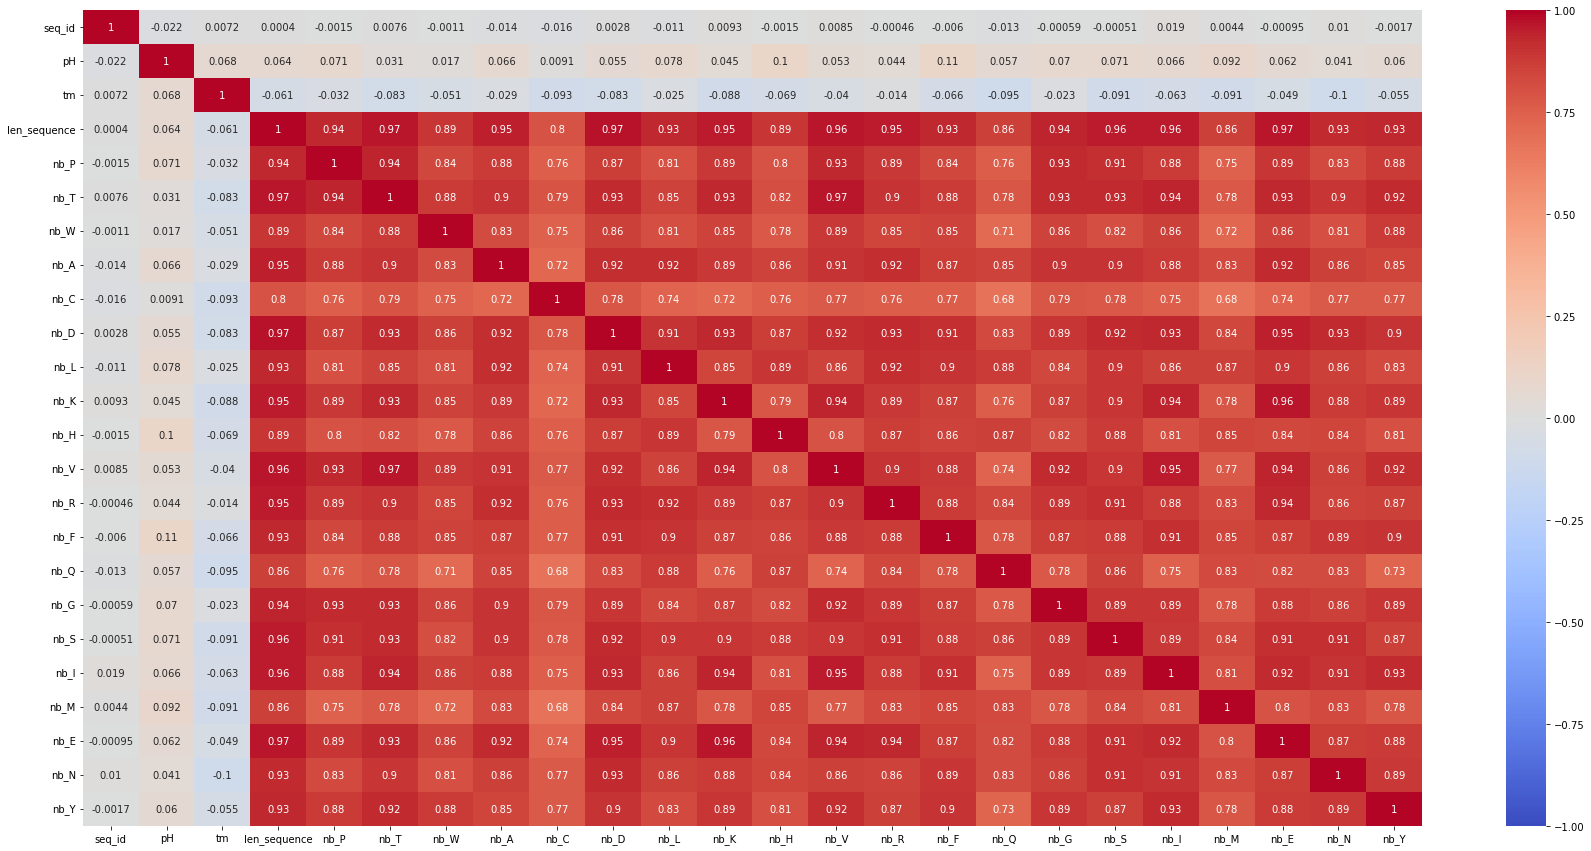

In [ ]:
import seaborn as sns
sns.heatmap(train_enz.corr(), vmin = -1, vmax = +1, cmap='coolwarm', annot=True)

On voit ici, que les features liées à la longeur de la séquence et aux nombres des différents acides aminés, sont très corrélées entre elles. Les corrélations avec les différentes features et pH/tm sont plus faible, En effet, pour la tm nous avons une corrélation maximale de -0.13, obtenu avec les acides aminés Asparagine (N), Glutamine (Q) et Cystéine (C). Pour le Ph nous avons une corrélation maximale de 0.11 avec l’Histidine (H). Nous pouvons dire ici au vu des corrélations entre la tm et les autres features que nous éviterons le dataleakage.

# Préparation de notre jeu de données pour la modélisation 

In [45]:
train_enz_num=train_enz.drop(axis=1, columns=['seq_id','protein_sequence','tm'])
Cible=train_enz['tm']

In [48]:
train_enz_num=train_enz.drop(axis=1, columns=['seq_id','protein_sequence','tm'])
Cible=train_enz['tm']

In [46]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
train_enz_num_std = pd.DataFrame(Scaler.fit_transform(train_enz_num), columns=train_enz_num.columns)

In [51]:
pip install seaborn


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 288.2/288.2 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 7.4 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 8.4 MB/s eta 0:00:00
     -------------------------------------- 161.3/161.3 kB 9.4 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


## Observation de notre cible 

C:\Users\rosaire.le\AppData\Local\Temp\ipykernel_13316\857016565.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Cible)


<AxesSubplot: xlabel='tm', ylabel='Density'>

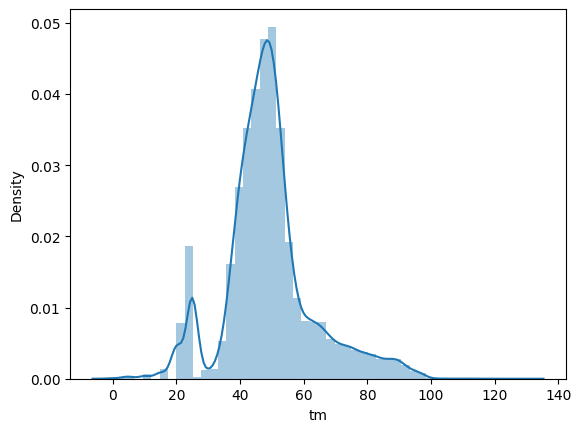

In [52]:
import seaborn as sns
sns.distplot(Cible)

In [53]:
from scipy.stats import skew

for i in range(0,10):
    Cible_log=np.log(Cible+i)
    asym=skew(Cible_log)
    if abs(asym) <0.05 :
        print(i,':',asym)

c:\Users\rosaire.le\Downloads\p7\p7\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rosaire.le\Downloads\p7\p7\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rosaire.le\Downloads\p7\p7\lib\site-packages\scipy\stats\_stats_py.py:1221: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


C:\Users\rosaire.le\AppData\Local\Temp\ipykernel_13316\2756790115.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Cible_log)


<AxesSubplot: xlabel='tm', ylabel='Density'>

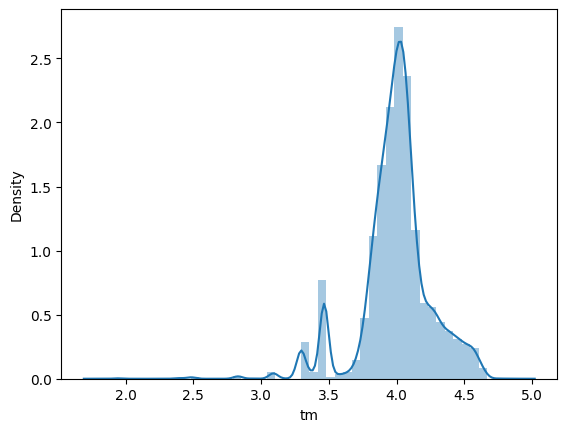

In [54]:
Cible_log=np.log(Cible+7)
sns.distplot(Cible_log)

On voit ici, que les données sont plus centrées que précédemment, nous continuerons donc avec ce df comme cible.

## Séparation de notre train set en train et test

In [ ]:
from sklearn.model_selection import train_test_split
xtrain_log, xtest_log, ytrain_log, ytest_log = train_test_split(train_enz_num_std, Cible_log, train_size=0.8, random_state = 21)
xtrain, xtest, ytrain, ytest = train_test_split(train_enz_num_std, Cible, train_size=0.8, random_state = 21)

# Test d'un premier algorithme avec les paramètres par défaut

## Dummy Regressor

### Avec notre cible loguée

In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.dummy import DummyRegressor

Dummy=DummyRegressor()
modele=Dummy.fit(xtrain_log,ytrain_log)
ypredict_log=modele.predict(xtest_log)

# Description R carré
print("R-squared:", np.round(r2_score(ytest_log, ypredict_log),3))
# mesure des erreurs entre des observations appariées exprimant le même phénomène
print("MAE:", np.round(mean_absolute_error(ytest_log, ypredict_log),3))
# mesure caractérisant la « précision » de cet estimateur
print("MSE:", np.round(mean_squared_error(ytest_log, ypredict_log),3))
# Mesure qui nous indique l'écart moyen entre les valeurs prédites et les valeurs observées dans un modèle
print('RMSE:', np.round(sqrt(mean_squared_error(ytest_log, ypredict_log)),3))

R-squared: -0.0
MAE: 0.179
MSE: 0.067
RMSE: 0.258


In [58]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0.5, 1.0, 'Tm - Prediction vs Test')

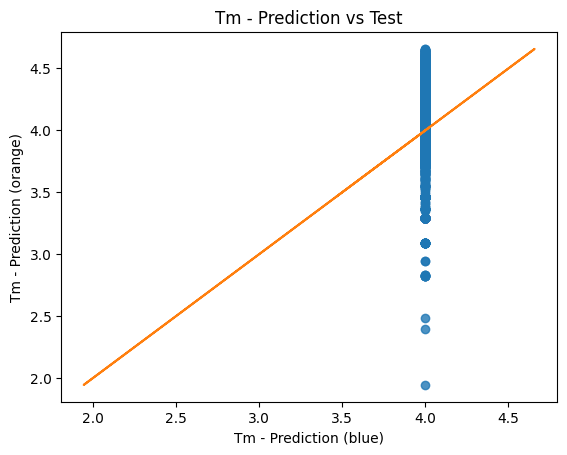

In [60]:
import matplotlib.pyplot as plt
# Pour avoir une visualisation de l'ajustement du modèle et de la prédiction en fonction des valeurs de test
sns.regplot(x=ypredict_log,y=ytest_log)
# Pour avoir la ligne des données des valeurs de test à comparer
plt.plot(ytest_log,ytest_log)
plt.xlabel("Tm - Prediction (blue)")
plt.ylabel("Tm - Prediction (orange)")
plt.title('Tm - Prediction vs Test')

Text(0.5, 1.0, 'Distribution des résidus selon la Tm')

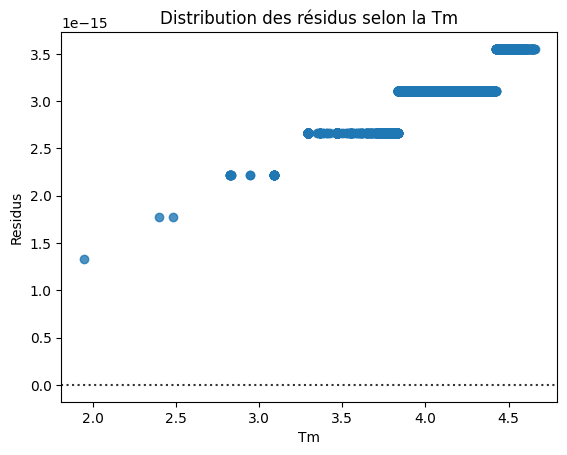

In [61]:
# Graphique de répartition des résidus
sns.residplot(x=ytest_log,y=ypredict_log)
plt.xlabel("Tm")
plt.ylabel("Residus")
plt.title('Distribution des résidus selon la Tm')

### Avec notre cible non loguée

In [62]:
modele=Dummy.fit(xtrain,ytrain)
ypredict=modele.predict(xtest)

# Description R carré
print("R-squared:", np.round(r2_score(ytest, ypredict),3))
# mesure des erreurs entre des observations appariées exprimant le même phénomène
print("MAE:", np.round(mean_absolute_error(ytest, ypredict),3))
# mesure caractérisant la « précision » de cet estimateur
print("MSE:", np.round(mean_squared_error(ytest, ypredict),3))
# Mesure qui nous indique l'écart moyen entre les valeurs prédites et les valeurs observées dans un modèle
print('RMSE:', np.round(sqrt(mean_squared_error(ytest, ypredict)),3))

R-squared: -0.0
MAE: 9.805
MSE: 193.645
RMSE: 13.916


Text(0.5, 1.0, 'Tm - Prediction vs Test')

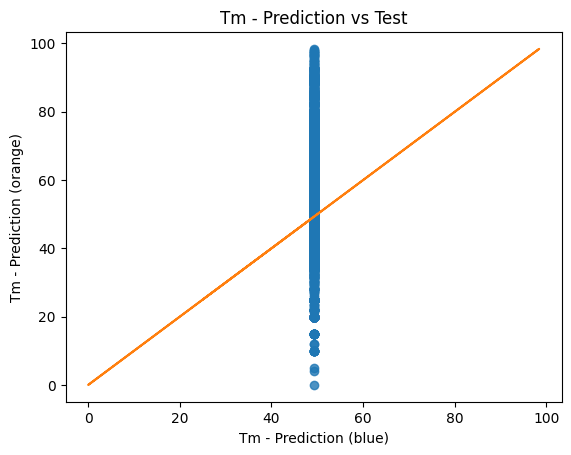

In [63]:
# Pour avoir une visualisation de l'ajustement du modèle et de la prédiction en fonction des valeurs de test
sns.regplot(x=ypredict,y=ytest)
# Pour avoir la ligne des données des valeurs de test à comparer
plt.plot(ytest,ytest)
plt.xlabel("Tm - Prediction (blue)")
plt.ylabel("Tm - Prediction (orange)")
plt.title('Tm - Prediction vs Test')

Text(0.5, 1.0, 'Distribution des résidus selon la Tm')

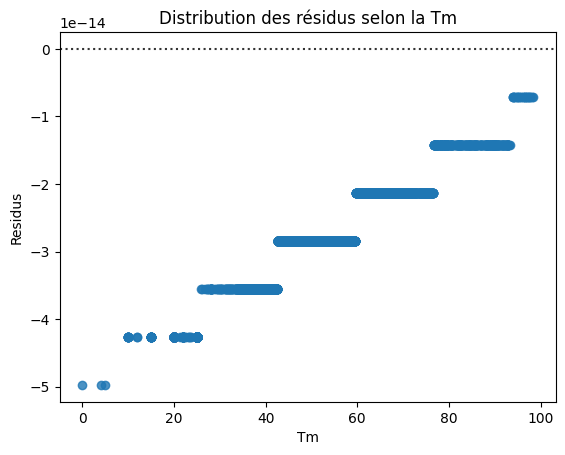

In [64]:
# Graphique de répartition des résidus
sns.residplot(x=ytest,y=ypredict)
plt.xlabel("Tm")
plt.ylabel("Residus")
plt.title('Distribution des résidus selon la Tm')

Même si ce modèle sert de base, il ne nous permet pas de voir l'impact de manière visuelle d'une transformation logarithmique sur notre jeu de données. Cependant au niveau des scores, nous voyons que les données loguées donnent de meilleurs résultats. Afin d'observer cela de manière visuelle, nous allons faire la même chose sur le modèle SVR.